In [ ]:
import pandas as pd

In [ ]:
df222=pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df222.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Define the list of labels to exclude
labels_to_exclude = ['kidneybeans', 'mungbean', 'muskmelon', 'pigeonpeas', 'watermelon']

# Filter the DataFrame to exclude rows with the specified labels
df_filtered = df[~df['label'].isin(labels_to_exclude)]

# Display the shape of the original and filtered DataFrames to confirm the removal
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

# Update the original DataFrame variable to hold the filtered data
df = df_filtered

Original DataFrame shape: (2200, 8)
Filtered DataFrame shape: (1700, 8)


In [ ]:
# Get the count of each unique value in the 'label' column
label_counts = df['label'].value_counts()

# Display the label counts
print("Counts of each label:")
display(label_counts)

Counts of each label:


,count
label,
rice,100
maize,100
chickpea,100
mothbeans,100
blackgram,100
lentil,100
pomegranate,100
banana,100
mango,100


# Task
Analyze the "Crop_recommendation.csv" dataset by performing the following steps: read the data, provide a summary and basic details, list all unique values in the output column, count the occurrences of each label, sort the labels alphabetically, split the data into training and testing sets with equal proportions of labels, preprocess and standardize the features, train XGBoost, Decision Tree, and Random Forest models, and compare their performance.

## Data splitting

### Subtask:
Split the data into training and testing sets, ensuring that the proportion of labels is equal in both sets (stratified split).


**Reasoning**:
Import the necessary function and split the data into training and testing sets with stratification.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets (80/20 split, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1360, 7)
Shape of X_test: (340, 7)
Shape of y_train: (1360,)
Shape of y_test: (340,)


## Preprocessing and standardization

### Subtask:
Preprocess the features (if necessary) and standardize them using techniques like StandardScaler.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (1360, 7)
X_test_scaled shape: (340, 7)


## Model Training

### Subtask:
Train XGBoost, Decision Tree, and Random Forest models on the training data.

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
xgb_model = XGBClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the models
print("Training XGBoost model...")
xgb_model.fit(X_train_scaled, y_train)
print("XGBoost model trained.")

print("\nTraining Decision Tree model...")
dt_model.fit(X_train_scaled, y_train)
print("Decision Tree model trained.")

print("\nTraining Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("Random Forest model trained.")

Training XGBoost model...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16], got ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'lentil' 'maize' 'mango' 'mothbeans' 'orange' 'papaya'
 'pomegranate' 'rice']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform y_train
y_train_encoded = le.fit_transform(y_train)

# Transform y_test
y_test_encoded = le.transform(y_test)

print("Original y_train labels:", y_train[:5].tolist())
print("Encoded y_train labels:", y_train_encoded[:5])
print("\nOriginal y_test labels:", y_test[:5].tolist())
print("Encoded y_test labels:", y_test_encoded[:5])

# Now train the models with the encoded labels
print("\nTraining XGBoost model with encoded labels...")
xgb_model.fit(X_train_scaled, y_train_encoded)
print("XGBoost model trained.")

print("\nTraining Decision Tree model with encoded labels...")
dt_model.fit(X_train_scaled, y_train_encoded)
print("Decision Tree model trained.")

print("\nTraining Random Forest model with encoded labels...")
rf_model.fit(X_train_scaled, y_train_encoded)
print("Random Forest model trained.")

Original y_train labels: ['pomegranate', 'chickpea', 'cotton', 'blackgram', 'blackgram']
Encoded y_train labels: [15  3  6  2  2]

Original y_test labels: ['cotton', 'rice', 'grapes', 'jute', 'papaya']
Encoded y_test labels: [ 6 16  7  8 14]

Training XGBoost model with encoded labels...
XGBoost model trained.

Training Decision Tree model with encoded labels...
Decision Tree model trained.

Training Random Forest model with encoded labels...
Random Forest model trained.


**Reasoning**:
Standardize the features in the training and testing datasets using StandardScaler.



## Model Evaluation and Comparison

### Subtask:
Evaluate the performance of each trained model on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score) and compare their performance.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_encoded, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

# Evaluate Decision Tree model
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
precision_dt = precision_score(y_test_encoded, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_encoded, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_encoded, y_pred_dt, average='weighted')

print("\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_encoded, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# You can also create a summary table or plot for better comparison

XGBoost Model Performance:
Accuracy: 0.9971
Precision: 0.9972
Recall: 0.9971
F1-score: 0.9971

Decision Tree Model Performance:
Accuracy: 0.9794
Precision: 0.9803
Recall: 0.9794
F1-score: 0.9795

Random Forest Model Performance:
Accuracy: 0.9853
Precision: 0.9866
Recall: 0.9853
F1-score: 0.9852


## Prediction with Custom Input

### Subtask:
Predict the top 3 crop recommendations for a custom input using the best performing model and convert the predicted labels back to their original format.

In [ ]:
import numpy as np

# Get the best performing model (Random Forest)
best_model = rf_model

# Define a function to get the top N predictions
def predict_top_n(model, scaler, label_encoder, input_data, n=3):
    # Convert input data to a numpy array and reshape
    input_array = np.array(input_data).reshape(1, -1)

    # Standardize the input data
    input_scaled = scaler.transform(input_array)

    # Get the prediction probabilities for each class
    probabilities = model.predict_proba(input_scaled)[0]

    # Get the indices of the top N probabilities
    top_n_indices = np.argsort(probabilities)[-n:][::-1]

    # Get the top N probabilities
    top_n_probabilities = probabilities[top_n_indices]

    # Convert the indices back to original labels
    top_n_labels = label_encoder.inverse_transform(top_n_indices)

    return list(zip(top_n_labels, top_n_probabilities))

# Example custom input (replace with your desired values)
# The order of values should be N, P, K, temperature, humidity, ph, rainfall
custom_input = [10, 55, 43, 10.88, 82.00, 1.50, 202.94]

# Get the top 3 predictions
top_3_predictions = predict_top_n(best_model, scaler, le, custom_input, n=3)

# Display the top 3 predictions
print(f"Top 3 predicted crops for input {custom_input}:")
for label, probability in top_3_predictions:
    print(f"- {label}: {probability:.4f}")

Top 3 predicted crops for input [10, 55, 43, 10.88, 82.0, 1.5, 202.94]:
- rice: 0.3100
- papaya: 0.3000
- pomegranate: 0.1600


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


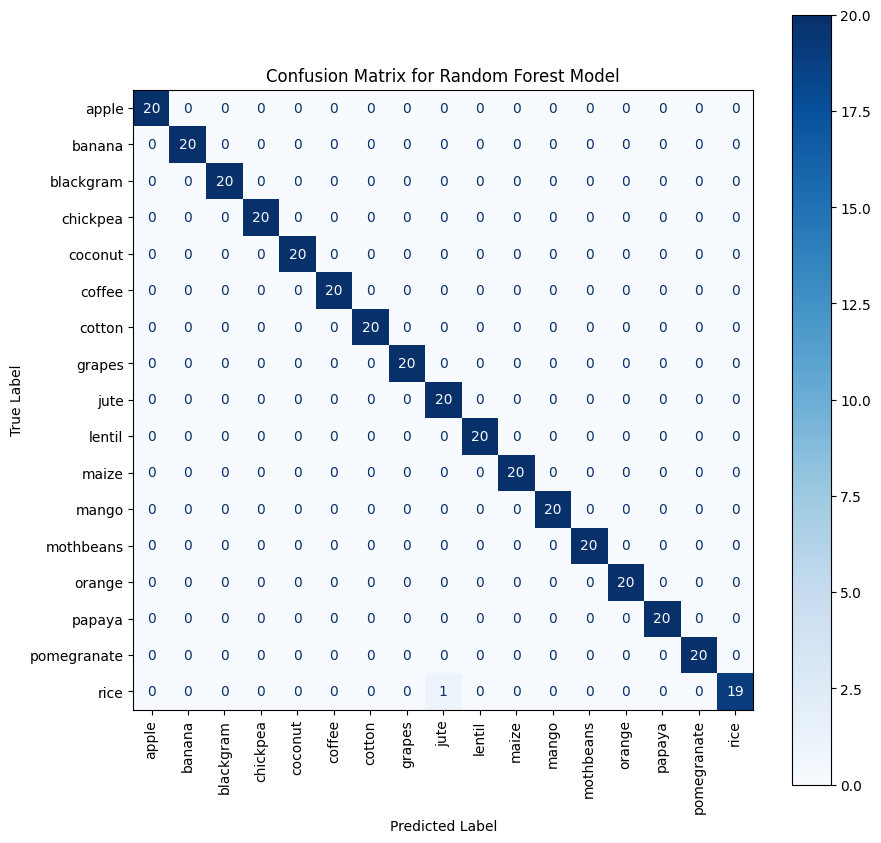

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from the best model (Random Forest) on the test set

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_xgb)

# Get the class labels from the LabelEncoder
class_labels = le.classes_

# Display the confusion matrix as a plot
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
import zipfile
import glob
import os

# --- 1. Define Paths ---
zip_file_path = '/content/Crops Dataset.zip'
extract_dir = '/content/crop_csvs/'

# --- 2. Create the Extraction Directory ---
# os.makedirs creates the directory.
# exist_ok=True means it won't crash if the folder already exists.
print(f"Creating directory: {extract_dir}")
os.makedirs(extract_dir, exist_ok=True)

# --- 3. Unzip the File ---
try:
    print(f"Unzipping {zip_file_path}...")
    # 'with' handles opening and closing the file safely
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # extractall() pulls everything out of the zip into the target directory
        zip_ref.extractall(extract_dir)
    print("Unzip complete.")

    # --- 4. List the CSV Files ---
    # We use glob to find all files ending in .csv inside the extract_dir
    # recursive=True ensures it finds them even if they are in a sub-folder
    search_pattern = os.path.join(extract_dir, "**", "*.csv")
    csv_file_list = glob.glob(search_pattern, recursive=True)

    print("-" * 30)
    print(f"Found {len(csv_file_list)} CSV files:")

    # Loop and print each file path found
    for file_path in csv_file_list:
        print(file_path)

except FileNotFoundError:
    print(f"ERROR: The file was not found at: {zip_file_path}")
except zipfile.BadZipFile:
    print("ERROR: The file is not a valid zip file or is corrupted.")

Creating directory: /content/crop_csvs/
Unzipping /content/Crops Dataset.zip...
Unzip complete.
------------------------------
Found 16 CSV files:
/content/crop_csvs/Crops Dataset/Banana.csv
/content/crop_csvs/Crops Dataset/Cotton.csv
/content/crop_csvs/Crops Dataset/Jute.csv
/content/crop_csvs/Crops Dataset/Grapes.csv
/content/crop_csvs/Crops Dataset/Pomegranate.csv
/content/crop_csvs/Crops Dataset/Rice.csv
/content/crop_csvs/Crops Dataset/Moath Dal.csv
/content/crop_csvs/Crops Dataset/Mango.csv
/content/crop_csvs/Crops Dataset/Kabuli Chana(Chickpeas-White).csv
/content/crop_csvs/Crops Dataset/Papaya.csv
/content/crop_csvs/Crops Dataset/Black Gram (Urd Beans)(Whole).csv
/content/crop_csvs/Crops Dataset/Orange.csv
/content/crop_csvs/Crops Dataset/Lentil (Masur)(Whole).csv
/content/crop_csvs/Crops Dataset/Apple.csv
/content/crop_csvs/Crops Dataset/Maize.csv
/content/crop_csvs/Crops Dataset/Coconut.csv


In [ ]:
import zipfile
import glob
import os

# This is the directory where you already unzipped the main file
extract_dir = '/content/crop_csvs/'

print(f"Searching for inner zip files inside: {extract_dir}...")

# 1. Create the search pattern to find any .zip file, even in subfolders
inner_zip_pattern = os.path.join(extract_dir, "**", "*.zip")
inner_zip_files = glob.glob(inner_zip_pattern, recursive=True)

# 2. Check if any zip files were found
if inner_zip_files:
    print(f"Found {len(inner_zip_files)} inner zip file(s). Now extracting...")

    # Loop through each inner zip file it found
    for inner_zip_path in inner_zip_files:
        print(f"  -> Processing: {inner_zip_path}")
        try:
            # 3. Extract its contents into the main '/content/crop_csvs/' directory
            with zipfile.ZipFile(inner_zip_path, 'r') as inner_zip_ref:
                inner_zip_ref.extractall(extract_dir)

            # 4. Remove the now-empty inner zip file to clean up
            print(f"  -> Done extracting. Removing: {inner_zip_path}")
            os.remove(inner_zip_path)

        except Exception as e:
            print(f"    ERROR extracting {inner_zip_path}: {e}")
else:
    print("No inner zip files were found in that directory.")

# --- 5. List All Final CSV Files ---
# After all unzipping is done, search again for all CSVs
print("-" * 30)
print("Final CSV File List:")
final_csv_pattern = os.path.join(extract_dir, "**", "*.csv")
final_csv_list = glob.glob(final_csv_pattern, recursive=True)

print(f"Found {len(final_csv_list)} total CSV files:")
for file_path in final_csv_list:
    print(file_path)

Searching for inner zip files inside: /content/crop_csvs/...
Found 1 inner zip file(s). Now extracting...
  -> Processing: /content/crop_csvs/Crops Dataset/Arhar Dal(Tur Dal).csv.zip
  -> Done extracting. Removing: /content/crop_csvs/Crops Dataset/Arhar Dal(Tur Dal).csv.zip
------------------------------
Final CSV File List:
Found 17 total CSV files:
/content/crop_csvs/Arhar Dal(Tur Dal).csv
/content/crop_csvs/Crops Dataset/Banana.csv
/content/crop_csvs/Crops Dataset/Cotton.csv
/content/crop_csvs/Crops Dataset/Jute.csv
/content/crop_csvs/Crops Dataset/Grapes.csv
/content/crop_csvs/Crops Dataset/Pomegranate.csv
/content/crop_csvs/Crops Dataset/Rice.csv
/content/crop_csvs/Crops Dataset/Moath Dal.csv
/content/crop_csvs/Crops Dataset/Mango.csv
/content/crop_csvs/Crops Dataset/Kabuli Chana(Chickpeas-White).csv
/content/crop_csvs/Crops Dataset/Papaya.csv
/content/crop_csvs/Crops Dataset/Black Gram (Urd Beans)(Whole).csv
/content/crop_csvs/Crops Dataset/Orange.csv
/content/crop_csvs/Crops Dat

In [ ]:
import os
import shutil

source_path = '/content/crop_csvs/Arhar Dal(Tur Dal).csv'
destination_dir = '/content/crop_csvs/Crops Dataset/'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Construct the full destination path
destination_path = os.path.join(destination_dir, os.path.basename(source_path))

# Move the file
try:
    shutil.move(source_path, destination_path)
    print(f"Successfully moved '{source_path}' to '{destination_path}'")
except FileNotFoundError:
    print(f"Error: Source file not found at '{source_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

# Optional: List files in both directories to confirm
print("\nFiles in source directory:")
!ls /content/crop_csvs/

print("\nFiles in destination directory:")
!ls /content/crop_csvs/Crops Dataset/

Successfully moved '/content/crop_csvs/Arhar Dal(Tur Dal).csv' to '/content/crop_csvs/Crops Dataset/Arhar Dal(Tur Dal).csv'

Files in source directory:
'Crops Dataset'   __MACOSX

Files in destination directory:
ls: cannot access '/content/crop_csvs/Crops': No such file or directory
ls: cannot access 'Dataset/': No such file or directory


In [ ]:
import pandas as pd
import glob
import os

# 1. Define the exact path where your CSVs are located
data_folder = "/content/crop_csvs/Crops Dataset/"

# 2. Use glob to get a list of all file paths ending in .csv
#    (We use os.path.join to build the path correctly)
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

print(f"Found {len(csv_files)} CSV files in the directory.")

# 3. Create an empty list to store each individual DataFrame
all_dfs_list = []

# 4. Loop through the list of file paths
for file_path in csv_files:
    # Load the individual CSV into a temporary DataFrame
    df = pd.read_csv(file_path)

    # --- This is the most important step ---
    # Get the filename (e.g., "Rice.csv") from the full path
    filename = os.path.basename(file_path)
    # Split the filename at the period and take the first part (e.g., "Rice")
    crop_name = filename.split('.')[0]

    # Create the new 'crop_name' column and fill it with this name
    df['crop_name'] = crop_name
    # -------------------------------------

    # Add this completed DataFrame to our list
    all_dfs_list.append(df)

print(f"All {len(all_dfs_list)} files have been loaded.")

# 5. Concatenate (combine) all DataFrames in the list into one master DataFrame
if all_dfs_list:
    master_df = pd.concat(all_dfs_list, ignore_index=True)

    print("\n--- Master DataFrame Successfully Created ---")

    # 6. Display info to verify everything worked
    print("\nMaster DataFrame Info:")
    master_df.info()

    print("\nExample Head:")
    print(master_df.head())

    print("\nExample Tail:")
    print(master_df.tail())

    print("\nUnique Crops Found:")
    # This should show your list of 17 crop names
    print(master_df['crop_name'].unique())
    print(f"Total unique crops: {master_df['crop_name'].nunique()}")
else:
    print("No CSV files were found to combine. Please check the directory path.")

# Your 'master_df' variable now holds all your data, ready for Step 2 (Cleaning)

Found 17 CSV files in the directory.
All 17 files have been loaded.

--- Master DataFrame Successfully Created ---

Master DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8873501 entries, 0 to 8873500
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   State Name                 object 
 1   District Name              object 
 2   Market Name                object 
 3   Variety                    object 
 4   Group                      object 
 5   Arrivals                   float64
 6   Min Price                  float64
 7   Max Price                  float64
 8   Modal Price                float64
 9   Reported Date              object 
 10  crop_name                  object 
 11  Arrivals (Tonnes)          float64
 12  Min Price (Rs./Quintal)    float64
 13  Max Price (Rs./Quintal)    float64
 14  Modal Price (Rs./Quintal)  float64
dtypes: float64(8), object(7)
memory usage: 1015.5+ MB

Example Head

In [ ]:
master_df.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals,Min Price,Max Price,Modal Price,Reported Date,crop_name,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,Arunachal Pradesh,Tawang,Tawang,Other,Fruits,0.13,2000.0,2000.0,2000.0,27 Aug 2005,Banana,NaN,NaN,NaN,NaN
1,Arunachal Pradesh,Tawang,Tawang,Other,Fruits,0.13,2000.0,2000.0,2000.0,27 Aug 2005,Banana,NaN,NaN,NaN,NaN
2,Arunachal Pradesh,Tawang,Tawang,Other,Fruits,0.10,2000.0,2000.0,2000.0,25 Aug 2005,Banana,NaN,NaN,NaN,NaN
3,Arunachal Pradesh,Tawang,Tawang,Other,Fruits,0.10,2000.0,2000.0,2000.0,25 Aug 2005,Banana,NaN,NaN,NaN,NaN
4,Arunachal Pradesh,Tawang,Tawang,Other,Fruits,0.08,2000.0,2000.0,2000.0,24 Aug 2005,Banana,NaN,NaN,NaN,NaN


In [ ]:
master_df.tail()

,State Name,District Name,Market Name,Variety,Group,Arrivals,Min Price,Max Price,Modal Price,Reported Date,crop_name,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
8873496,Jharkhand,Giridih,Giridih,Other,Spices,NaN,NaN,NaN,NaN,26 Jul 2006,Coconut,1.0,9700.0,9800.0,9800.0
8873497,Jharkhand,Giridih,Giridih,Other,Spices,NaN,NaN,NaN,NaN,25 Jul 2006,Coconut,1.0,9700.0,9900.0,9900.0
8873498,Jharkhand,Garhwa,Gadhwah,Other,Spices,NaN,NaN,NaN,NaN,26 Oct 2003,Coconut,0.1,250.0,300.0,275.0
8873499,Jharkhand,Garhwa,Gadhwah,Other,Spices,NaN,NaN,NaN,NaN,27 Sep 2003,Coconut,5.0,1500.0,1700.0,1650.0
8873500,Jharkhand,Garhwa,Gadhwah,Other,Spices,NaN,NaN,NaN,NaN,26 Sep 2003,Coconut,2.0,1500.0,1700.0,1600.0


In [ ]:
# Convert 'Reported Date' to datetime objects
master_df['Reported Date'] = pd.to_datetime(master_df['Reported Date'], errors='coerce')

# Find the minimum and maximum dates
min_date = master_df['Reported Date'].min()
max_date = master_df['Reported Date'].max()

# Display the date range
print(f"Date range in 'Reported Date' column: {min_date} to {max_date}")

Date range in 'Reported Date' column: 2001-01-10 00:00:00 to 2024-02-02 00:00:00


In [ ]:
import pandas as pd

print("Starting the filtering process...")

# --- Step 1: Ensure 'Reported Date' is a datetime object ---
# This is critical for date calculations.
# We'll add errors='coerce' to turn any bad dates into NaT, then drop them.
if not pd.api.types.is_datetime64_any_dtype(master_df['Reported Date']):
    print("Converting 'Reported Date' column to datetime...")
    master_df['Reported Date'] = pd.to_datetime(master_df['Reported Date'], errors='coerce')
    master_df = master_df.dropna(subset=['Reported Date'])

print("Date column is ready.")

# --- Step 2: Define the filtering function ---
def get_last_two_years(group):
    """
    For any given dataframe group, this finds the max date
    and returns only the rows from 2 years prior to that date.
    """
    # 1. Find the single latest date for this specific group
    latest_date = group['Reported Date'].max()

    # 2. Calculate the cutoff start date (2 years back)
    start_date_cutoff = latest_date - pd.DateOffset(years=2)

    # 3. Return only the rows in that date range
    return group[group['Reported Date'] >= start_date_cutoff]

# --- Step 3: Apply the function to each 'crop_name' group ---
print("Grouping by crop and filtering for the last 2 years of data for each...")
# group_keys=False keeps the output as a clean, single-index DataFrame
filtered_df = master_df.groupby('crop_name', group_keys=False).apply(get_last_two_years)

print("\n--- Filtering Complete! ---")


# 'filtered_df' is your new master dataframe.
# You can overwrite the old one if you want:
# master_df = filtered_df

Starting the filtering process...
Date column is ready.
Grouping by crop and filtering for the last 2 years of data for each...

--- Filtering Complete! ---


/tmp/ipython-input-3535780117.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = master_df.groupby('crop_name', group_keys=False).apply(get_last_two_years)


In [ ]:
print("\nOld DataFrame Info:")
master_df.info()


Old DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8873501 entries, 0 to 8873500
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   State Name                 object        
 1   District Name              object        
 2   Market Name                object        
 3   Variety                    object        
 4   Group                      object        
 5   Arrivals                   float64       
 6   Min Price                  float64       
 7   Max Price                  float64       
 8   Modal Price                float64       
 9   Reported Date              datetime64[ns]
 10  crop_name                  object        
 11  Arrivals (Tonnes)          float64       
 12  Min Price (Rs./Quintal)    float64       
 13  Max Price (Rs./Quintal)    float64       
 14  Modal Price (Rs./Quintal)  float64       
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 1015

In [ ]:
print("\nNew Filtered DataFrame Info:")
filtered_df.info()



New Filtered DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 999493 entries, 2366 to 4195434
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   State Name                 999493 non-null  object        
 1   District Name              999493 non-null  object        
 2   Market Name                999493 non-null  object        
 3   Variety                    999493 non-null  object        
 4   Group                      999493 non-null  object        
 5   Arrivals                   194979 non-null  float64       
 6   Min Price                  194979 non-null  float64       
 7   Max Price                  194979 non-null  float64       
 8   Modal Price                194979 non-null  float64       
 9   Reported Date              999493 non-null  datetime64[ns]
 10  crop_name                  999493 non-null  object        
 11  Arrivals (Tonnes)      

In [ ]:
print("\n--- Verification of New Date Ranges by Crop ---")
# This will show you the new min and max date for each crop,
# proving that each one has its own 2-year window.
verification_report = filtered_df.groupby('crop_name')['Reported Date'].agg(['min', 'max'])
print(verification_report)


--- Verification of New Date Ranges by Crop ---
                                     min        max
crop_name                                          
Banana                        2022-02-02 2024-02-02
Black Gram (Urd Beans)(Whole) 2022-02-02 2024-02-02
Coconut                       2022-02-02 2024-02-02
Cotton                        2022-02-02 2024-02-02
Grapes                        2022-02-02 2024-02-02
Jute                          2022-02-02 2024-02-02
Kabuli Chana(Chickpeas-White) 2022-02-02 2024-02-02
Lentil (Masur)(Whole)         2022-02-02 2024-02-02
Maize                         2022-02-02 2024-02-02
Mango                         2022-02-02 2024-02-02
Moath Dal                     2022-02-02 2024-02-02
Orange                        2022-02-02 2024-02-02
Papaya                        2022-02-02 2024-02-02
Pomegranate                   2022-02-02 2024-02-02
Rice                          2022-02-02 2024-02-02


In [ ]:
# Print all column names of the filtered_df DataFrame
print("Column names of the filtered DataFrame:")
filtered_df.columns

Column names of the filtered DataFrame:


Index(['State Name', 'District Name', 'Market Name', 'Variety', 'Group',
       'Arrivals', 'Min Price', 'Max Price', 'Modal Price', 'Reported Date',
       'crop_name', 'Arrivals (Tonnes)', 'Min Price (Rs./Quintal)',
       'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)'],
      dtype='object')

In [ ]:
# Get the count of each unique value in the 'Variety' column
variety_counts = filtered_df['Variety'].value_counts()

# Display the variety counts
print("Counts of each variety:")
print(variety_counts)

Counts of each variety:
Variety
Other                 349734
Banana - Ripe          61579
Pomogranate            57397
III                    53786
Papaya                 43098
                       ...  
A-51-9 24mm. FIne          1
Surkha                     1
Kaddi                      1
Broken Rice(Kanki)         1
Kichudi                    1
Name: count, Length: 175, dtype: int64


Null value counts for each column:


,0
State Name,0
District Name,0
Market Name,0
Variety,0
Group,0
Arrivals,804514
Min Price,804514
Max Price,804514
Modal Price,804514
Reported Date,0


In [ ]:
filtered_df.size

14992395

Starting plot generation for district: Karnal...
Calculating daily average price per crop across all mandis in the district...
Generating interactive time-series chart...

--- SUCCESS! ---
Interactive chart saved to: district_crop_price_chart.html
Find this file in your file browser, then download and open it in Chrome/Firefox.

--- SUCCESS! ---
Interactive chart saved to: district_crop_price_variation.json


In [ ]:
import pandas as pd

print(f"Original DataFrame has {len(filtered_df.columns)} columns.")

# 1. Define the 5 columns you requested to keep
cols_to_keep = [
    'Reported Date',
    'crop_name',
    'District Name',
    'Modal Price (Rs./Quintal)', # This is the good, clean price column
    'Modal Price'                # This is the redundant one
]

# 2. Create the new DataFrame with only these 5 columns
model_df = filtered_df[cols_to_keep].copy()

print(f"New DataFrame created with 5 selected columns.")

# 3. Rename the essential columns to our simple, clean names
#    We will rename the "good" price column and drop the other one.
model_df.rename(columns={
    'Reported Date': 'date',
    'crop_name': 'crop_id',
    'District Name': 'district_id',
    'Modal Price (Rs./QuintAL)': 'price' # This will be our target
}, inplace=True)

# 4. Now, drop the redundant 'Modal Price' column you kept, as 'price' is our clean target
if 'Modal Price' in model_df.columns:
    model_df = model_df.drop(columns=['Modal Price'])

# This leaves you with the 4 columns needed for your new model structure
print("\n--- Final Cleaned DataFrame for Model 2 ---")
model_df.info()

print("\nFinal DataFrame Head:")
print(model_df.head())

Original DataFrame has 15 columns.
New DataFrame created with 5 selected columns.

--- Final Cleaned DataFrame for Model 2 ---
<class 'pandas.core.frame.DataFrame'>
Index: 999493 entries, 2366 to 4195434
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       999493 non-null  datetime64[ns]
 1   crop_id                    999493 non-null  object        
 2   district_id                999493 non-null  object        
 3   Modal Price (Rs./Quintal)  804514 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 38.1+ MB

Final DataFrame Head:
           date crop_id district_id  Modal Price (Rs./Quintal)
2366 2022-12-30  Banana    Udhampur                        NaN
2367 2022-12-29  Banana    Udhampur                        NaN
2368 2022-12-28  Banana    Udhampur                        NaN
2369 2022-12-27  Banana    Udhamp

In [ ]:
import pandas as pd

PRICE_COL = 'Modal Price (Rs./Quintal)' # Using the exact column name from your output

print(f"--- Starting Advanced Fill Process ---")
print(f"Nulls to fill: {model_df[PRICE_COL].isnull().sum()}")

# --- STEP 1: Sort the DataFrame (Prerequisite) ---
# This ensures our ffill/bfill works correctly.
sort_keys = ['crop_id', 'district_id', 'date']
print(f"\nSorting DataFrame by {sort_keys}...")
model_df = model_df.sort_values(by=sort_keys).reset_index(drop=True)


# --- STEP 2: Grouped Forward-Fill (ffill) ---
# This is the correct command using .transform()
print("Running STEP 2.1: Grouped Forward-Fill (ffill)...")
model_df[PRICE_COL] = model_df.groupby(['crop_id', 'district_id'])[PRICE_COL].transform('ffill')
print(f"Nulls remaining after ffill: {model_df[PRICE_COL].isnull().sum()}")


# --- STEP 3: Grouped Backward-Fill (bfill) ---
# This fills any NaNs left at the very start of a group
print("\nRunning STEP 2.2: Grouped Backward-Fill (bfill)...")
model_df[PRICE_COL] = model_df.groupby(['crop_id', 'district_id'])[PRICE_COL].transform('bfill')
nulls_after_grouped_fill = model_df[PRICE_COL].isnull().sum()
print(f"Nulls remaining after grouped fills: {nulls_after_grouped_fill}")
# The remaining 194,979 nulls are 100% "Empty Series"

# --- STEP 4: Fill Empty Series with the GLOBAL CROP MEDIAN ---
if nulls_after_grouped_fill > 0:
    print("\nRunning STEP 3: Filling 'Empty Series' with their crop's global median...")

    # Calculate the global median FOR EACH CROP (ignoring nulls)
    # and broadcast that value to all rows for that crop
    global_crop_medians = model_df.groupby('crop_id')[PRICE_COL].transform('median')

    # Fill remaining NaNs with the corresponding crop's global median
    model_df[PRICE_COL] = model_df[PRICE_COL].fillna(global_crop_medians)

    nulls_after_crop_median = model_df[PRICE_COL].isnull().sum()
    print(f"Nulls remaining after crop median fill: {nulls_after_crop_median}")
else:
    print("\nSkipping Step 3: All nulls were filled by ffill/bfill.")


# --- STEP 5: Final Failsafe (Global Dataset Median) ---
# If any nulls are left (meaning a crop had ZERO data anywhere),
# fill them with the entire dataset's median price.
if model_df[PRICE_COL].isnull().sum() > 0:
    print("\nRunning STEP 4: Filling remaining nulls with global dataset median...")
    overall_median = model_df[PRICE_COL].median()
    model_df[PRICE_COL] = model_df[PRICE_COL].fillna(overall_median)


# --- FINAL VERIFICATION ---
print("\n--- FILL COMPLETE ---")
print("All null values should be filled.")
model_df.info()

print("\nFinal Null Check:")
print(model_df.isnull().sum())

--- Starting Advanced Fill Process ---
Nulls to fill: 194979

Sorting DataFrame by ['crop_id', 'district_id', 'date']...
Running STEP 2.1: Grouped Forward-Fill (ffill)...
Nulls remaining after ffill: 194979

Running STEP 2.2: Grouped Backward-Fill (bfill)...
Nulls remaining after grouped fills: 194979

Running STEP 3: Filling 'Empty Series' with their crop's global median...
Nulls remaining after crop median fill: 194979

Running STEP 4: Filling remaining nulls with global dataset median...

--- FILL COMPLETE ---
All null values should be filled.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999493 entries, 0 to 999492
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       999493 non-null  datetime64[ns]
 1   crop_id                    999493 non-null  object        
 2   district_id                999493 non-null  object        
 3   Modal Price 

In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999493 entries, 0 to 999492
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       999493 non-null  datetime64[ns]
 1   crop_id                    999493 non-null  object        
 2   district_id                999493 non-null  object        
 3   Modal Price (Rs./Quintal)  999493 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 30.5+ MB


In [ ]:
model_df.head()

,date,crop_id,district_id,Modal Price (Rs./Quintal)
0,2022-09-18,Banana,Adilabad,4000.0
1,2022-09-20,Banana,Adilabad,4000.0
2,2022-09-21,Banana,Adilabad,4000.0
3,2022-09-22,Banana,Adilabad,4000.0
4,2022-09-29,Banana,Adilabad,4000.0


In [ ]:
import pandas as pd

print("--- Verifying DataFrame Sort Order ---")

# Define the required order
sort_keys = ['crop_id', 'district_id', 'date']

# Create an index that represents the *correctly sorted* order
sorted_index = model_df.sort_values(by=sort_keys).index

# Check if the DataFrame's current index is the same as the sorted index
# The .equals() method is a fast and reliable way to check
if model_df.index.equals(sorted_index):
    print("✅ Verification Passed: Your DataFrame is already sorted correctly.")
else:
    print("⚠️ Verification Failed: DataFrame is not sorted correctly.")
    print(f"Sorting the DataFrame by {sort_keys} now...")

    # Sort the DataFrame and reset the index to be clean (0, 1, 2, ...)
    model_df = model_df.sort_values(by=sort_keys).reset_index(drop=True)

    print("✅ DataFrame has been sorted.")

print("\n--- Your data is now ready for Feature Engineering ---")
print("\nHere's a sample of the correctly sorted data:")
print(model_df.head())

--- Verifying DataFrame Sort Order ---
✅ Verification Passed: Your DataFrame is already sorted correctly.

--- Your data is now ready for Feature Engineering ---

Here's a sample of the correctly sorted data:
        date crop_id district_id  Modal Price (Rs./Quintal)
0 2022-09-18  Banana    Adilabad                     4000.0
1 2022-09-20  Banana    Adilabad                     4000.0
2 2022-09-21  Banana    Adilabad                     4000.0
3 2022-09-22  Banana    Adilabad                     4000.0
4 2022-09-29  Banana    Adilabad                     4000.0


In [ ]:
import pandas as pd

# Define your target column name (the one we just cleaned)
PRICE_COL = 'Modal Price (Rs./Quintal)'
print(f"Starting Feature Engineering on {len(model_df)} rows...")

# --- STEP 1: Convert Categorical Columns ---
# This is crucial for LightGBM. It tells the model these are categories, not numbers.
# This also saves a huge amount of memory.
print("Converting object columns to 'category' dtype...")
model_df['crop_id'] = model_df['crop_id'].astype('category')
model_df['district_id'] = model_df['district_id'].astype('category')


# --- STEP 2: Create the Target Variable (y) ---
# This is what we want to predict: the price 90 days from now.
print("Creating the target variable (y_target_90d)...")
model_df['y_target_90d'] = model_df.groupby(
    ['crop_id', 'district_id']
)[PRICE_COL].shift(-90)


# --- STEP 3: Create Input Features (X) ---

# A. Date Features (to learn seasonality)
print("Creating Date features (month, day_of_year)...")
model_df['month'] = model_df['date'].dt.month
model_df['day_of_year'] = model_df['date'].dt.dayofyear

# B. Lag Features (to learn from past prices)
# These are the model's most powerful predictors.
print("Creating Lag features (price 90 and 365 days ago)...")
model_df['price_lag_90d'] = model_df.groupby(
    ['crop_id', 'district_id']
)[PRICE_COL].shift(90)

model_df['price_lag_365d'] = model_df.groupby(
    ['crop_id', 'district_id']
)[PRICE_COL].shift(365)


# --- STEP 4: Create Final, Clean Training Set ---
# This step creates all the 'NaN' values from shifting.
# For example, the first 365 rows of any group cannot have a 'price_lag_365d'.
# The last 90 rows cannot have a 'y_target_90d'.
# We must drop all these rows because a model cannot train on null values.
print("\nDropping all rows with NaN values created by lag/shift operations...")
rows_before_drop = model_df.shape[0]
model_2_training_df = model_df.dropna()
rows_after_drop = model_2_training_df.shape[0]

print(f"Dropped {rows_before_drop - rows_after_drop} rows.")


# --- FINAL VERIFICATION ---
print("\n--- Feature Engineering Complete! ---")
print("This is your final, model-ready dataset. All rows are complete.")
model_2_training_df.info()

print("\nExample of the final data (head):")
print(model_2_training_df.head())

Starting Feature Engineering on 999493 rows...
Converting object columns to 'category' dtype...
Creating the target variable (y_target_90d)...
Creating Date features (month, day_of_year)...


/tmp/ipython-input-2656944897.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_df['y_target_90d'] = model_df.groupby(
/tmp/ipython-input-2656944897.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_df['price_lag_90d'] = model_df.groupby(


Creating Lag features (price 90 and 365 days ago)...

Dropping all rows with NaN values created by lag/shift operations...
Dropped 537437 rows.

--- Feature Engineering Complete! ---
This is your final, model-ready dataset. All rows are complete.
<class 'pandas.core.frame.DataFrame'>
Index: 462056 entries, 599 to 999079
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       462056 non-null  datetime64[ns]
 1   crop_id                    462056 non-null  category      
 2   district_id                462056 non-null  category      
 3   Modal Price (Rs./Quintal)  462056 non-null  float64       
 4   y_target_90d               462056 non-null  float64       
 5   month                      462056 non-null  int32         
 6   day_of_year                462056 non-null  int32         
 7   price_lag_90d              462056 non-null  float64       
 8   p

/tmp/ipython-input-2656944897.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_df['price_lag_365d'] = model_df.groupby(


In [ ]:
import pandas as pd
import lightgbm as lgb

# Let's assume your final DataFrame is named 'model_2_training_df'
# --- 1. Define Features (X) and Target (y) ---

# This is the column name from your previous step's output
PRICE_COL = 'Modal Price (Rs./Quintal)'

# The target we created
TARGET = 'y_target_90d'

# The features we created
FEATURES = [
    'crop_id',
    'district_id',
    'month',
    'day_of_year',
    'price_lag_90d',
    'price_lag_365d'
]

CATEGORICAL_FEATURES = ['crop_id', 'district_id']

# --- 2. Perform the Time-Series Split ---
# We will use the last 6 months of data for validation.
# First, find the latest date in the dataset
latest_date = model_2_training_df['date'].max()

# Then, calculate the cutoff date (6 months before the latest date)
cutoff_date = latest_date - pd.DateOffset(months=6)

print(f"Data will be split by date.")
print(f"Training data will be everything before: {cutoff_date.date()}")
print(f"Validation data will be everything after: {cutoff_date.date()}")

# Split the DataFrame
train_df = model_2_training_df[model_2_training_df['date'] < cutoff_date]
valid_df = model_2_training_df[model_2_training_df['date'] >= cutoff_date]

# Create our final X (features) and y (target) sets
X_train = train_df[FEATURES]
y_train = train_df[TARGET]
X_valid = valid_df[FEATURES]
y_valid = valid_df[TARGET]

print(f"\nTraining set has {len(X_train)} rows.")
print(f"Validation set has {len(X_valid)} rows.")


# --- 3. Initialize and Train the LightGBM Model ---
print("\n--- Starting Model Training ---")

# Initialize the model with good default parameters
model_2 = lgb.LGBMRegressor(
    objective='regression_l1',  # MAE is a good, robust loss function
    n_estimators=1000,          # We'll train up to 1000 trees
    learning_rate=0.05,
    num_leaves=31,
    n_jobs=-1,                  # Use all available CPU cores
    seed=42
)

Data will be split by date.
Training data will be everything before: 2023-07-30
Validation data will be everything after: 2023-07-30

Training set has 324332 rows.
Validation set has 137724 rows.

--- Starting Model Training ---


In [ ]:
model_2.fit(
    X_train,
    y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='mae', # Mean Absolute Error
    categorical_feature=CATEGORICAL_FEATURES,
    # This is the magic: it stops training when the validation score stops improving
    callbacks=[lgb.early_stopping(100, verbose=True)]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[263]	valid_0's l1: 463.859


LGBMRegressor(learning_rate=0.05, n_estimators=1000, n_jobs=-1,
              objective='regression_l1', seed=42)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 24.8 MB/s eta 0:00:00


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Use the same train/validation sets from your last script
# X_train, y_train, X_valid, y_valid
# FEATURES, CATEGORICAL_FEATURES

def objective(trial):
    """This function is called by Optuna for each trial."""

    # 1. Define the parameters to search
    params = {
        'objective': 'regression_l1',
        'metric': 'mae',
        'n_estimators': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'n_jobs': -1,
        'seed': 42
    }

    # 2. Train a model with these parameters
    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='mae',
        callbacks=[lgb.early_stopping(100, verbose=False)]
    )

    # 3. Get the score and return it
    preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    return mae

# --- Start the Tuning Process ---
# We want to MINIMIZE the error, so direction is 'minimize'
study = optuna.create_study(direction='minimize')

# Run 50 trials. You can increase this for a more thorough search.
study.optimize(objective, n_trials=50)

# --- Print the Best Results ---
print("\n--- Tuning Complete! ---")
print("Best trial score (MAE):", study.best_value)
print("Best parameters found:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2025-09-17 14:25:33,924] A new study created in memory with name: no-name-257155d8-cba4-460b-b713-3ffe945bdc3b


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:26:26,334] Trial 0 finished with value: 456.2412100917945 and parameters: {'learning_rate': 0.015253445873744758, 'num_leaves': 44, 'max_depth': 12, 'min_child_samples': 10, 'reg_alpha': 0.039926396121461316, 'reg_lambda': 0.18455702122764617, 'colsample_bytree': 0.6668233482658205}. Best is trial 0 with value: 456.2412100917945.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:26:35,540] Trial 1 finished with value: 448.7900800937924 and parameters: {'learning_rate': 0.09813697783149891, 'num_leaves': 47, 'max_depth': 4, 'min_child_samples': 83, 'reg_alpha': 0.7816797376687543, 'reg_lambda': 0.72720345605543, 'colsample_bytree': 0.8401359064113931}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-17 14:26:42,825] Trial 2 finished with value: 452.49761370093535 and parameters: {'learning_rate': 0.09636893573357046, 'num_leaves': 51, 'max_depth': 6, 'min_child_samples': 59, 'reg_alpha': 0.09105591985389727, 'reg_lambda': 0.15153700707592188, 'colsample_bytree': 0.8389293873135036}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:26:50,423] Trial 3 finished with value: 464.6233377540814 and parameters: {'learning_rate': 0.09587408504179545, 'num_leaves': 80, 'max_depth': 10, 'min_child_samples': 49, 'reg_alpha': 0.31604930838364176, 'reg_lambda': 0.7545810285932001, 'colsample_bytree': 0.6842667325225067}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:27:28,704] Trial 4 finished with value: 457.4515727184096 and parameters: {'learning_rate': 0.0799540564550866, 'num_leaves': 24, 'max_depth': 19, 'min_child_samples': 36, 'reg_alpha': 0.09708370247619191, 'reg_lambda': 0.14870137718411203, 'colsample_bytree': 0.928931643207062}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:27:35,848] Trial 5 finished with value: 459.8925922046725 and parameters: {'learning_rate': 0.09554187342733621, 'num_leaves': 75, 'max_depth': 16, 'min_child_samples': 27, 'reg_alpha': 0.6864123135261034, 'reg_lambda': 0.8205787683375176, 'colsample_bytree': 0.8417569592276362}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:27:53,826] Trial 6 finished with value: 583.767614343804 and parameters: {'learning_rate': 0.024055337469665802, 'num_leaves': 24, 'max_depth': 1, 'min_child_samples': 19, 'reg_alpha': 0.5439694080112292, 'reg_lambda': 0.024511608874842383, 'colsample_bytree': 0.8095580908622865}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:28:28,086] Trial 7 finished with value: 457.49916389913056 and parameters: {'learning_rate': 0.012972735665583967, 'num_leaves': 69, 'max_depth': 8, 'min_child_samples': 33, 'reg_alpha': 0.4688794903423317, 'reg_lambda': 0.19336889886696473, 'colsample_bytree': 0.8070665772148756}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:28:52,523] Trial 8 finished with value: 457.92166200703906 and parameters: {'learning_rate': 0.01764659229409845, 'num_leaves': 41, 'max_depth': 8, 'min_child_samples': 91, 'reg_alpha': 0.012796638401972205, 'reg_lambda': 0.32376084115011894, 'colsample_bytree': 0.60353580417721}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-09-17 14:29:15,267] Trial 9 finished with value: 463.10371284221543 and parameters: {'learning_rate': 0.01825558526548722, 'num_leaves': 97, 'max_depth': 2, 'min_child_samples': 44, 'reg_alpha': 0.41367275537063075, 'reg_lambda': 0.6868315041783372, 'colsample_bytree': 0.6886821577024413}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:29:52,957] Trial 10 finished with value: 449.2498235545398 and parameters: {'learning_rate': 0.056884610547055466, 'num_leaves': 56, 'max_depth': 4, 'min_child_samples': 98, 'reg_alpha': 0.9403495435342253, 'reg_lambda': 0.9987787147086169, 'colsample_bytree': 0.992706099480932}. Best is trial 1 with value: 448.7900800937924.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-09-17 14:30:11,942] Trial 11 finished with value: 448.60242220029534 and parameters: {'learning_rate': 0.05469967052257452, 'num_leaves': 58, 'max_depth': 4, 'min_child_samples': 100, 'reg_alpha': 0.9960094721743014, 'reg_lambda': 0.9914443261188559, 'colsample_bytree': 0.9975851148710115}. Best is trial 11 with value: 448.60242220029534.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:30:54,115] Trial 12 finished with value: 454.6295393413878 and parameters: {'learning_rate': 0.0544055105159079, 'num_leaves': 35, 'max_depth': -1, 'min_child_samples': 75, 'reg_alpha': 0.9854811198543094, 'reg_lambda': 0.9803436957444697, 'colsample_bytree': 0.9319647284560444}. Best is trial 11 with value: 448.60242220029534.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:31:05,961] Trial 13 finished with value: 441.9246160803414 and parameters: {'learning_rate': 0.05493041043870674, 'num_leaves': 65, 'max_depth': 5, 'min_child_samples': 79, 'reg_alpha': 0.8059164627470129, 'reg_lambda': 0.551869375518968, 'colsample_bytree': 0.9001898641218881}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:31:31,955] Trial 14 finished with value: 442.0373352193925 and parameters: {'learning_rate': 0.05035638526550531, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 69, 'reg_alpha': 0.8380028381478819, 'reg_lambda': 0.5227343470307101, 'colsample_bytree': 0.9992257626365176}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:31:43,737] Trial 15 finished with value: 454.81184397398624 and parameters: {'learning_rate': 0.039614934360394906, 'num_leaves': 84, 'max_depth': 13, 'min_child_samples': 71, 'reg_alpha': 0.7881690930083439, 'reg_lambda': 0.4800062101972741, 'colsample_bytree': 0.9135667188637736}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:31:55,775] Trial 16 finished with value: 447.4071983933518 and parameters: {'learning_rate': 0.06947820349942474, 'num_leaves': 64, 'max_depth': 6, 'min_child_samples': 63, 'reg_alpha': 0.812214475560389, 'reg_lambda': 0.5556432306632269, 'colsample_bytree': 0.8962618954318592}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:32:25,212] Trial 17 finished with value: 456.15829963459777 and parameters: {'learning_rate': 0.03649231016949238, 'num_leaves': 88, 'max_depth': -1, 'min_child_samples': 76, 'reg_alpha': 0.6344049686279798, 'reg_lambda': 0.46933441592248637, 'colsample_bytree': 0.9460486017540555}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:32:40,067] Trial 18 finished with value: 451.08634904271025 and parameters: {'learning_rate': 0.03971867194847203, 'num_leaves': 70, 'max_depth': 11, 'min_child_samples': 63, 'reg_alpha': 0.8934590480901408, 'reg_lambda': 0.5676603658154937, 'colsample_bytree': 0.8792751881166927}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-17 14:32:50,591] Trial 19 finished with value: 452.13079945847943 and parameters: {'learning_rate': 0.06594756678758124, 'num_leaves': 65, 'max_depth': 7, 'min_child_samples': 82, 'reg_alpha': 0.6647958681876938, 'reg_lambda': 0.33474660719052773, 'colsample_bytree': 0.7387240616175066}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:33:08,451] Trial 20 finished with value: 457.84398381962006 and parameters: {'learning_rate': 0.048421818367861864, 'num_leaves': 93, 'max_depth': 14, 'min_child_samples': 88, 'reg_alpha': 0.3065984440078558, 'reg_lambda': 0.37946554205539546, 'colsample_bytree': 0.9657505795101227}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-09-17 14:33:16,159] Trial 21 finished with value: 449.7099682709083 and parameters: {'learning_rate': 0.06965126523012394, 'num_leaves': 62, 'max_depth': 5, 'min_child_samples': 64, 'reg_alpha': 0.8293519629030532, 'reg_lambda': 0.6178649114488076, 'colsample_bytree': 0.8875744217132692}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-09-17 14:33:39,183] Trial 22 finished with value: 455.58774884538576 and parameters: {'learning_rate': 0.07506691855055903, 'num_leaves': 76, 'max_depth': 2, 'min_child_samples': 54, 'reg_alpha': 0.8606668158012993, 'reg_lambda': 0.5825693878024293, 'colsample_bytree': 0.8776646306645894}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:33:47,324] Trial 23 finished with value: 453.30590704026315 and parameters: {'learning_rate': 0.06299405308538068, 'num_leaves': 54, 'max_depth': 9, 'min_child_samples': 70, 'reg_alpha': 0.7333167620129925, 'reg_lambda': 0.46595618824133006, 'colsample_bytree': 0.7570495336180598}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-09-17 14:34:02,014] Trial 24 finished with value: 443.5549503668367 and parameters: {'learning_rate': 0.08336942345039344, 'num_leaves': 64, 'max_depth': 6, 'min_child_samples': 56, 'reg_alpha': 0.5546087243407418, 'reg_lambda': 0.8452125732707417, 'colsample_bytree': 0.9651061749152995}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:34:12,744] Trial 25 finished with value: 486.34493111534965 and parameters: {'learning_rate': 0.08287948172534244, 'num_leaves': 73, 'max_depth': 2, 'min_child_samples': 45, 'reg_alpha': 0.5723931024529458, 'reg_lambda': 0.8512225561351627, 'colsample_bytree': 0.9662960269903418}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:35:00,674] Trial 26 finished with value: 444.31617877632243 and parameters: {'learning_rate': 0.031464058636094756, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 54, 'reg_alpha': 0.5865638051368259, 'reg_lambda': 0.895257880913171, 'colsample_bytree': 0.9662530873631597}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:35:19,314] Trial 27 finished with value: 453.295855635235 and parameters: {'learning_rate': 0.04469029173910546, 'num_leaves': 36, 'max_depth': 7, 'min_child_samples': 81, 'reg_alpha': 0.3894344805952072, 'reg_lambda': 0.6440865858323284, 'colsample_bytree': 0.9976690879244825}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:35:34,530] Trial 28 finished with value: 456.7951870355984 and parameters: {'learning_rate': 0.047604751476003675, 'num_leaves': 81, 'max_depth': 10, 'min_child_samples': 68, 'reg_alpha': 0.720208362246062, 'reg_lambda': 0.7955064516515769, 'colsample_bytree': 0.966064567852422}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-09-17 14:35:41,979] Trial 29 finished with value: 625.8353371073596 and parameters: {'learning_rate': 0.088632380211033, 'num_leaves': 46, 'max_depth': 1, 'min_child_samples': 91, 'reg_alpha': 0.21876698408359346, 'reg_lambda': 0.3960322832790329, 'colsample_bytree': 0.9195702725989121}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:36:10,305] Trial 30 finished with value: 456.86540698179374 and parameters: {'learning_rate': 0.06154418905448934, 'num_leaves': 69, 'max_depth': 3, 'min_child_samples': 8, 'reg_alpha': 0.9034452258287956, 'reg_lambda': 0.26785810890711964, 'colsample_bytree': 0.9500540723226911}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:36:45,816] Trial 31 finished with value: 446.08850075892326 and parameters: {'learning_rate': 0.03000649887816107, 'num_leaves': 61, 'max_depth': 6, 'min_child_samples': 57, 'reg_alpha': 0.5962878165916277, 'reg_lambda': 0.8628407429996428, 'colsample_bytree': 0.9798458584530951}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:37:07,672] Trial 32 finished with value: 448.13398143144065 and parameters: {'learning_rate': 0.030093124177460493, 'num_leaves': 52, 'max_depth': 5, 'min_child_samples': 49, 'reg_alpha': 0.4705015258524334, 'reg_lambda': 0.9210022138740899, 'colsample_bytree': 0.9570840213235327}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:37:18,252] Trial 33 finished with value: 446.1347806438767 and parameters: {'learning_rate': 0.05166198502408407, 'num_leaves': 66, 'max_depth': 4, 'min_child_samples': 39, 'reg_alpha': 0.7415388748474864, 'reg_lambda': 0.7196484150669057, 'colsample_bytree': 0.9067609215989254}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:37:30,924] Trial 34 finished with value: 453.7600335430491 and parameters: {'learning_rate': 0.029803958236845507, 'num_leaves': 59, 'max_depth': 8, 'min_child_samples': 52, 'reg_alpha': 0.5176566830627757, 'reg_lambda': 0.9053835441591103, 'colsample_bytree': 0.8583407333220243}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2025-09-17 14:37:55,367] Trial 35 finished with value: 444.39460146236377 and parameters: {'learning_rate': 0.058661598303410924, 'num_leaves': 47, 'max_depth': 6, 'min_child_samples': 59, 'reg_alpha': 0.6224307930686118, 'reg_lambda': 0.7855764076581575, 'colsample_bytree': 0.9318693061403913}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:38:10,295] Trial 36 finished with value: 446.5087538265773 and parameters: {'learning_rate': 0.04400295846160644, 'num_leaves': 75, 'max_depth': 5, 'min_child_samples': 77, 'reg_alpha': 0.6875507816134692, 'reg_lambda': 0.6713286751337799, 'colsample_bytree': 0.9805314767212617}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:38:17,554] Trial 37 finished with value: 455.6759821163836 and parameters: {'learning_rate': 0.0906609293867128, 'num_leaves': 51, 'max_depth': 9, 'min_child_samples': 67, 'reg_alpha': 0.7631042377454971, 'reg_lambda': 0.7407694812917759, 'colsample_bytree': 0.8515725889747265}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:38:30,114] Trial 38 finished with value: 460.14062140275223 and parameters: {'learning_rate': 0.07579027232927843, 'num_leaves': 71, 'max_depth': 3, 'min_child_samples': 57, 'reg_alpha': 0.5341091255417166, 'reg_lambda': 0.5247844913775711, 'colsample_bytree': 0.9342257473546711}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:38:52,215] Trial 39 finished with value: 452.21868624309275 and parameters: {'learning_rate': 0.025151433925320234, 'num_leaves': 79, 'max_depth': 7, 'min_child_samples': 17, 'reg_alpha': 0.4103218083140262, 'reg_lambda': 0.9231943768668693, 'colsample_bytree': 0.7775123338444462}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:39:34,496] Trial 40 finished with value: 459.57140873491926 and parameters: {'learning_rate': 0.034337305234042076, 'num_leaves': 65, 'max_depth': 0, 'min_child_samples': 30, 'reg_alpha': 0.2784476261316433, 'reg_lambda': 0.004755333906469983, 'colsample_bytree': 0.9500092477487992}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:39:48,961] Trial 41 finished with value: 450.02948838051174 and parameters: {'learning_rate': 0.05847907709277814, 'num_leaves': 49, 'max_depth': 20, 'min_child_samples': 60, 'reg_alpha': 0.5939886734130359, 'reg_lambda': 0.8218915317286729, 'colsample_bytree': 0.9323000163444239}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:40:21,233] Trial 42 finished with value: 442.07277313284584 and parameters: {'learning_rate': 0.05075059245316945, 'num_leaves': 57, 'max_depth': 6, 'min_child_samples': 46, 'reg_alpha': 0.6297567939723894, 'reg_lambda': 0.7816228625712597, 'colsample_bytree': 0.9808081614588811}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:40:33,757] Trial 43 finished with value: 458.55677066548157 and parameters: {'learning_rate': 0.048288226417591375, 'num_leaves': 57, 'max_depth': 3, 'min_child_samples': 39, 'reg_alpha': 0.47723879870757446, 'reg_lambda': 0.8852239371322589, 'colsample_bytree': 0.9802849091122934}. Best is trial 13 with value: 441.9246160803414.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:40:45,043] Trial 44 finished with value: 440.4115009003523 and parameters: {'learning_rate': 0.05249544814459613, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 48, 'reg_alpha': 0.6577179134859555, 'reg_lambda': 0.700935854371776, 'colsample_bytree': 0.8288401865686591}. Best is trial 44 with value: 440.4115009003523.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:40:54,401] Trial 45 finished with value: 448.935618060924 and parameters: {'learning_rate': 0.052330289566509196, 'num_leaves': 41, 'max_depth': 8, 'min_child_samples': 46, 'reg_alpha': 0.6885468262685459, 'reg_lambda': 0.7149177010484122, 'colsample_bytree': 0.8300845313537745}. Best is trial 44 with value: 440.4115009003523.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-09-17 14:41:06,404] Trial 46 finished with value: 450.4231660095876 and parameters: {'learning_rate': 0.04273415907025094, 'num_leaves': 31, 'max_depth': 4, 'min_child_samples': 23, 'reg_alpha': 0.8134176510696178, 'reg_lambda': 0.6191069733979552, 'colsample_bytree': 0.8193046108302234}. Best is trial 44 with value: 440.4115009003523.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:41:15,241] Trial 47 finished with value: 456.0794220457388 and parameters: {'learning_rate': 0.06578415471097356, 'num_leaves': 21, 'max_depth': 17, 'min_child_samples': 39, 'reg_alpha': 0.6548091681188357, 'reg_lambda': 0.7713001399284329, 'colsample_bytree': 0.791753800236817}. Best is trial 44 with value: 440.4115009003523.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:41:23,668] Trial 48 finished with value: 457.83102266013964 and parameters: {'learning_rate': 0.05142576401422275, 'num_leaves': 28, 'max_depth': 11, 'min_child_samples': 49, 'reg_alpha': 0.7669440553650796, 'reg_lambda': 0.6706861583790302, 'colsample_bytree': 0.8664114609486842}. Best is trial 44 with value: 440.4115009003523.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 324332, number of used features: 6
[LightGBM] [Info] Start training from score 4000.000000


[I 2025-09-17 14:41:33,770] Trial 49 finished with value: 447.12580236943194 and parameters: {'learning_rate': 0.05578543104619623, 'num_leaves': 43, 'max_depth': 7, 'min_child_samples': 86, 'reg_alpha': 0.9592544962746805, 'reg_lambda': 0.4287161018648944, 'colsample_bytree': 0.8998748354794261}. Best is trial 44 with value: 440.4115009003523.



--- Tuning Complete! ---
Best trial score (MAE): 440.4115009003523
Best parameters found:
  learning_rate: 0.05249544814459613
  num_leaves: 40
  max_depth: 5
  min_child_samples: 48
  reg_alpha: 0.6577179134859555
  reg_lambda: 0.700935854371776
  colsample_bytree: 0.8288401865686591


In [ ]:
!pip install catboost

  Using cached catboost-1.2.8-cp312-cp312-manylinux2014_x86_64.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import catboost as cb
from sklearn.metrics import mean_absolute_error

# Let's assume your training and validation DataFrames are ready:
# train_df, valid_df

# --- 1. Define Features (X) and Target (y) ---
# These are the same as before
TARGET = 'y_target_90d'
FEATURES = [
    'crop_id',
    'district_id',
    'month',
    'day_of_year',
    'price_lag_90d',
    'price_lag_365d'
]
CATEGORICAL_FEATURES = ['crop_id', 'district_id']

# Create our final X and y sets
X_train = train_df[FEATURES]
y_train = train_df[TARGET]
X_valid = valid_df[FEATURES]
y_valid = valid_df[TARGET]

print(f"Training CatBoost on {len(X_train)} rows...")

# --- 2. Initialize and Train the CatBoost Model ---

# Initialize the model
model_cat = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    loss_function='MAE', # This is our evaluation metric, same as 'l1'
    random_seed=42,
    verbose=100 # This will print the progress every 100 iterations
)

# Train the model!
model_cat.fit(
    X_train,
    y_train,
    eval_set=(X_valid, y_valid),
    cat_features=CATEGORICAL_FEATURES,
    # CatBoost will automatically stop when the validation score stops improving
    early_stopping_rounds=100
)

print("\n--- ✅ CatBoost Model Training Complete! ---")

# --- 3. Evaluate the Result ---
# Get the best score from the training process
best_score = model_cat.get_best_score()['validation']['MAE']
print(f"\nYour LightGBM model's best MAE was: 463.86")
print(f"Your new CatBoost model's best MAE is: {best_score:.2f}")

if best_score < 463.86:
    print("\n🚀 Performance Increased! CatBoost is giving a better result.")
else:
    print("\nPerformance is similar or slightly lower. More feature engineering or tuning may be needed.")

Training CatBoost on 324332 rows...
0:	learn: 1604.6591433	test: 1468.4057781	best: 1468.4057781 (0)	total: 316ms	remaining: 5m 15s


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Let's assume you have your clean, filled, and sorted 'model_df'
# with columns: ['date', 'crop_id', 'district_id', 'price']
# (Note: I've renamed 'Modal Price (Rs./Quintal)' to 'price' for simplicity)
if 'Modal Price (Rs./Quintal)' in model_df.columns:
    model_df.rename(columns={'Modal Price (Rs./Quintal)': 'price'}, inplace=True)

print("Starting the corrected LSTM data preparation...")

# --- STEP 1: Label Encode Categorical Features ---
# This converts text like "Rice" into numbers (0, 1, 2...).
print("Label Encoding crop_id and district_id...")
le_crop = LabelEncoder()
le_district = LabelEncoder()

# Create new columns with the integer encodings
data_for_lstm = model_df.copy()
data_for_lstm['crop_encoded'] = le_crop.fit_transform(data_for_lstm['crop_id'])
data_for_lstm['district_encoded'] = le_district.fit_transform(data_for_lstm['district_id'])

# --- STEP 2: Scale ALL Numeric Features ---
# Neural networks need all inputs to be in a similar range, typically [0, 1].
print("Scaling all numeric features...")

# Select only the columns the model will actually see
features_to_scale = ['price', 'crop_encoded', 'district_encoded']
data_to_scale = data_for_lstm[features_to_scale]

# We will use one scaler for all data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# --- STEP 3: Create 3D Sequences (The Windowing) ---
# This function will create the sliding windows of data.
def create_sequences(data, n_past, n_future):
    X, y = [], []
    for i in range(len(data) - n_past - n_future + 1):
        # The past N days of ALL features
        X.append(data[i : i + n_past])
        # The 'price' from N days in the future (price is the first column, index 0)
        y.append(data[i + n_past + n_future - 1, 0])
    return np.array(X), np.array(y)

N_PAST = 30   # Use the last 30 days of data
N_FUTURE = 90 # Predict the price 90 days out

print(f"Creating 3D sequences with a window of {N_PAST} days...")
X, y = create_sequences(scaled_data, N_PAST, N_FUTURE)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# --- STEP 4: Split into Training and Testing Sets ---
# This is a simple split, as the data is already sorted by time.
# We will use the last 20% of sequences for validation.
split_index = int(len(X) * 0.8)

X_train_3d, X_valid_3d = X[:split_index], X[split_index:]
y_train_3d, y_valid_3d = y[:split_index], y[split_index:]

print(f"Training set shape: {X_train_3d.shape}")
print(f"Validation set shape: {X_valid_3d.shape}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Let's assume your data is ready from the last step:
# X_train_3d, y_train_3d, X_valid_3d, y_valid_3d

# --- 1. Build the LSTM Model Architecture ---
print("Building the LSTM model architecture...")

model_lstm = Sequential()

# Input LSTM layer with 50 neurons
# return_sequences=True is needed to pass the output to the next LSTM layer
model_lstm.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(X_train_3d.shape[1], X_train_3d.shape[2])
))
model_lstm.add(Dropout(0.2)) # Helps prevent overfitting

# Second LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))

# Final output layer (a single neuron to predict the single price)
model_lstm.add(Dense(units=1))

# --- 2. Compile the Model ---
# We tell the model to use the 'adam' optimizer and to track 'mae' (Mean Absolute Error)
model_lstm.compile(optimizer='adam', loss='mae')
model_lstm.summary()


# --- 3. Train the Model ---
print("\n--- Starting LSTM Model Training ---")
print("This may take a significant amount of time...")

# This callback will stop training automatically if the validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


Building the LSTM model architecture...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting LSTM Model Training ---
This may take a significant amount of time...


In [ ]:
history = model_lstm.fit(
    X_train_3d,
    y_train_3d,
    epochs=50,          # Set a max number of passes through the data
    batch_size=64,
    validation_data=(X_valid_3d, y_valid_3d),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
12493/12493 ━━━━━━━━━━━━━━━━━━━━ 504s 40ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 2/50
  831/12493 ━━━━━━━━━━━━━━━━━━━━ 7:07 37ms/step - loss: 9.2308e-04

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Let's assume you have these variables from the previous steps:
# model_lstm: your trained Keras model
# X_valid_3d: your 3D validation features
# y_valid_3d: your scaled validation target
# scaler: the MinMaxScaler object you used for preparation

print("Evaluating model on the validation set...")

# --- 1. Make Predictions (These will be scaled) ---
predictions_scaled = model_lstm.predict(X_valid_3d)

# --- 2. Inverse Transform the Predictions back to Rupees ---
# We use a "dummy array" trick because the scaler was fit on multiple features.
# We create an array of zeros with the right shape and put our prediction in the first column.
dummy_array_preds = np.zeros((len(predictions_scaled), scaler.n_features_in_))
dummy_array_preds[:, 0] = predictions_scaled.ravel() # .ravel() flattens the array

# Now inverse transform the whole array and take just the first column
predictions_inr = scaler.inverse_transform(dummy_array_preds)[:, 0]

# --- 3. Inverse Transform the TRUE values back to Rupees ---
# We must do the same for the y_valid_3d to make a fair comparison
dummy_array_true = np.zeros((len(y_valid_3d), scaler.n_features_in_))
dummy_array_true[:, 0] = y_valid_3d.ravel()

y_valid_inr = scaler.inverse_transform(dummy_array_true)[:, 0]

# --- 4. Calculate the Final MAE in Rupees ---
mae_lstm = mean_absolute_error(y_valid_inr, predictions_inr)

print("\n--- LSTM Model Evaluation ---")
print(f"The Mean Absolute Error on the validation set is: ₹{mae_lstm:.2f}")

# --- Compare to your previous best model ---
print(f"\nYour previous best model (CatBoost) had an MAE of: ₹435.23")
if mae_lstm < 435.23:
    print("🚀 SUCCESS: The LSTM model is more accurate!")
else:
    print("The LSTM model is not as accurate as the CatBoost model on this data.")

Evaluating model on the validation set...
6247/6247 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step

--- LSTM Model Evaluation ---
The Mean Absolute Error on the validation set is: ₹760.84

Your previous best model (CatBoost) had an MAE of: ₹435.23
The LSTM model is not as accurate as the CatBoost model on this data.


In [ ]:
import numpy as np

# Let's assume you have your final 3D arrays from the previous step:
# X (shape: e.g., 800000, 30, 6)
# y (shape: e.g., 800000,)

# Define a filename
filename = 'lstm_prepared_data.npz'

print(f"Saving X (shape: {X.shape}) and y (shape: {y.shape}) to {filename}...")

# Use np.savez_compressed to save multiple arrays into one file
# We give them names ('X_data', 'y_data') to easily retrieve them later
np.savez_compressed(filename, X_data=X, y_data=y)

print("✅ Data saved successfully.")

Saving X (shape: (999374, 30, 3)) and y (shape: (999374,)) to lstm_prepared_data.npz...
✅ Data saved successfully.


In [ ]:
import numpy as np
import os

# Let's assume you still have your final 3D arrays named X and y
filename = 'lstm_prepared_data1.npz'

print("Attempting to save the data again. This might take a minute...")
print(f"Saving X (shape: {X.shape}) and y (shape: {y.shape})...")

# Re-run the save command
np.savez_compressed(filename, X_data=X, y_data=y)

print("✅ Data save command finished.")


# --- NEW: VERIFICATION STEP ---
# Check if the file exists and has a reasonable size
try:
    file_size_mb = os.path.getsize(filename) / (1024 * 1024)
    print(f"Verification successful. File size is: {file_size_mb:.2f} MB")

    if file_size_mb < 1: # If the file is less than 1MB, it's probably an error
        print("⚠️ WARNING: File size is very small. The save may have failed.")
    else:
        print("👍 File size looks good. You should be able to load it now.")
except FileNotFoundError:
    print("❌ ERROR: The file was not created. The save process failed.")

Attempting to save the data again. This might take a minute...
Saving X (shape: (999374, 30, 3)) and y (shape: (999374,))...
✅ Data save command finished.
Verification successful. File size is: 8.24 MB
👍 File size looks good. You should be able to load it now.


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load your Kaggle Crop Recommendation dataset
# Let's assume you've loaded it into a DataFrame called 'crop_df'
# Example: crop_df = pd.read_csv('Crop_recommendation.csv')

# 2. Prepare the data by selecting only the 4 necessary columns
soil_features_df = crop_df[['N', 'ph', 'P', 'K']].copy()
print("Using these 4 columns for training:")
print(soil_features_df.head())

# 3. Define your features (X) and split the data
X = soil_features_df[['N', 'ph']]
y_p = soil_features_df['P'] # Target for Phosphorus
y_k = soil_features_df['K'] # Target for Potassium

# Split data for training and testing
X_train, X_test, y_p_train, y_p_test, y_k_train, y_k_test = train_test_split(
    X, y_p, y_k, test_size=0.2, random_state=42
)

# --- 4. Train a Model to Predict Phosphorus (P) ---
print("\n--- Training Model for Phosphorus (P) ---")
model_p = lgb.LGBMRegressor(random_state=42)
model_p.fit(X_train, y_p_train)

# Evaluate the P model
p_preds = model_p.predict(X_test)
p_mae = mean_absolute_error(y_p_test, p_preds)
p_r2 = r2_score(y_p_test, p_preds)

print(f"Phosphorus (P) Model MAE: {p_mae:.2f}")
print(f"Phosphorus (P) Model R-squared: {p_r2:.2f}")


# --- 5. Train a Model to Predict Potassium (K) ---
print("\n--- Training Model for Potassium (K) ---")
model_k = lgb.LGBMRegressor(random_state=42)
model_k.fit(X_train, y_k_train)

# Evaluate the K model
k_preds = model_k.predict(X_test)
k_mae = mean_absolute_error(y_k_test, k_preds)
k_r2 = r2_score(y_k_test, k_preds)

print(f"Potassium (K) Model MAE: {k_mae:.2f}")
print(f"Potassium (K) Model R-squared: {k_r2:.2f}")

# --- 6. How to Use Your Trained Models ---
print("\n--- Example Prediction ---")
# Let's say a farmer provides their N and pH values
new_data = pd.DataFrame({'N': [90], 'ph': [6.5]})

predicted_p = model_p.predict(new_data)
predicted_k = model_k.predict(new_data)

print(f"For N=90 and pH=6.5:")
print(f"  > Predicted Phosphorus (P) is: {predicted_p[0]:.2f}")
print(f"  > Predicted Potassium (K) is: {predicted_k[0]:.2f}")

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model
# Let's assume you have these variables from the previous steps:
# model_lstm: your trained Keras model
# X_valid_3d: your 3D validation features
# y_valid_3d: your scaled validation target
# scaler: the MinMaxScaler object you used for preparation

print("Evaluating model on the validation set...")
model_lstm1=load_model('lstm_model.keras')
# --- 1. Make Predictions (These will be scaled) ---
predictions_scaled = model_lstm1.predict(X_valid_3d)

# --- 2. Inverse Transform the Predictions back to Rupees ---
# We use a "dummy array" trick because the scaler was fit on multiple features.
# We create an array of zeros with the right shape and put our prediction in the first column.
dummy_array_preds = np.zeros((len(predictions_scaled), scaler.n_features_in_))
dummy_array_preds[:, 0] = predictions_scaled.ravel() # .ravel() flattens the array

# Now inverse transform the whole array and take just the first column
predictions_inr = scaler.inverse_transform(dummy_array_preds)[:, 0]

# --- 3. Inverse Transform the TRUE values back to Rupees ---
# We must do the same for the y_valid_3d to make a fair comparison
dummy_array_true = np.zeros((len(y_valid_3d), scaler.n_features_in_))
dummy_array_true[:, 0] = y_valid_3d.ravel()

y_valid_inr = scaler.inverse_transform(dummy_array_true)[:, 0]

# --- 4. Calculate the Final MAE in Rupees ---
mae_lstm = mean_absolute_error(y_valid_inr, predictions_inr)

print("\n--- LSTM Model Evaluation ---")
print(f"The Mean Absolute Error on the validation set is: ₹{mae_lstm:.2f}")

# --- Compare to your previous best model ---
print(f"\nYour previous best model (CatBoost) had an MAE of: ₹435.23")
if mae_lstm < 435.23:
    print("🚀 SUCCESS: The LSTM model is more accurate!")
else:
    print("The LSTM model is not as accurate as the CatBoost model on this data.")

Evaluating model on the validation set...
6247/6247 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step

--- LSTM Model Evaluation ---
The Mean Absolute Error on the validation set is: ₹717.84

Your previous best model (CatBoost) had an MAE of: ₹435.23
The LSTM model is not as accurate as the CatBoost model on this data.


In [ ]:
import pandas as pd
import xgboost as xgb  # Import XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load your Kaggle Crop Recommendation dataset
# Let's assume you've loaded it into a DataFrame called 'crop_df'
# Example: crop_df = pd.read_csv('Crop_recommendation.csv')

# 2. Prepare the data by selecting only the 4 necessary columns
soil_features_df = crop_df[['N', 'ph', 'P', 'K']].copy()
print("Using these 4 columns for training:")
print(soil_features_df.head())

# 3. Define your features (X) and split the data
X = soil_features_df[['N', 'ph']]
y_p = soil_features_df['P'] # Target for Phosphorus
y_k = soil_features_df['K'] # Target for Potassium

# Split data for training and testing
X_train, X_test, y_p_train, y_p_test, y_k_train, y_k_test = train_test_split(
    X, y_p, y_k, test_size=0.2, random_state=42
)

# --- 4. Train a Model to Predict Phosphorus (P) ---
print("\n--- Training XGBoost Model for Phosphorus (P) ---")
# Changed from lgb.LGBMRegressor to xgb.XGBRegressor
model_p = xgb.XGBRegressor(random_state=42)
model_p.fit(X_train, y_p_train)

# Evaluate the P model
p_preds = model_p.predict(X_test)
p_mae = mean_absolute_error(y_p_test, p_preds)
p_r2 = r2_score(y_p_test, p_preds)

print(f"Phosphorus (P) Model MAE: {p_mae:.2f}")
print(f"Phosphorus (P) Model R-squared: {p_r2:.2f}")


# --- 5. Train a Model to Predict Potassium (K) ---
print("\n--- Training XGBoost Model for Potassium (K) ---")
# Changed from lgb.LGBMRegressor to xgb.XGBRegressor
model_k = xgb.XGBRegressor(random_state=42)
model_k.fit(X_train, y_k_train)

# Evaluate the K model
k_preds = model_k.predict(X_test)
k_mae = mean_absolute_error(y_k_test, k_preds)
k_r2 = r2_score(y_k_test, k_preds)

print(f"Potassium (K) Model MAE: {k_mae:.2f}")
print(f"Potassium (K) Model R-squared: {k_r2:.2f}")

# --- 6. How to Use Your Trained Models ---
print("\n--- Example Prediction ---")
# Let's say a farmer provides their N and pH values
new_data = pd.DataFrame({'N': [90], 'ph': [6.5]})

predicted_p = model_p.predict(new_data)
predicted_k = model_k.predict(new_data)

print(f"For N=90 and pH=6.5:")
print(f"  > Predicted Phosphorus (P) is: {predicted_p[0]:.2f}")
print(f"  > Predicted Potassium (K) is: {predicted_k[0]:.2f}")

Using these 4 columns for training:
    N        ph   P   K
0  90  6.502985  42  43
1  85  7.038096  58  41
2  60  7.840207  55  44
3  74  6.980401  35  40
4  78  7.628473  42  42

--- Training XGBoost Model for Phosphorus (P) ---
Phosphorus (P) Model MAE: 24.76
Phosphorus (P) Model R-squared: -0.16

--- Training XGBoost Model for Potassium (K) ---
Potassium (K) Model MAE: 33.56
Potassium (K) Model R-squared: -0.36

--- Example Prediction ---
For N=90 and pH=6.5:
  > Predicted Phosphorus (P) is: 42.80
  > Predicted Potassium (K) is: 40.91


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# --- 1. Load and Prepare Data ---
try:
    # Let's assume the dataset is named 'Crop_recommendation.csv'
    df = pd.read_csv('Crop_recommendation.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("ERROR: Make sure 'Crop_recommendation.csv' is in your directory.")
    # You would exit or handle the error here
    exit()

# --- 2. Define Features (X) and Target (y) ---
# We are intentionally excluding 'P' and 'K'
FEATURES = ['N', 'ph', 'temperature', 'humidity', 'rainfall']
TARGET = 'label'

X = df[FEATURES]
y = df[TARGET]

# --- 3. Encode the Target Variable ---
# Machine learning models work with numbers, so we convert crop names to 0, 1, 2...
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 4. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded # Stratify ensures both train/test sets have a similar mix of crops
)

print(f"\nData split into {len(X_train)} training rows and {len(X_test)} testing rows.")


# --- 5. Train and Evaluate the Random Forest Model ---
print("\n--- Training Random Forest Classifier ---")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

# Make predictions
rf_preds = model_rf.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"\nRandom Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("Random Forest Classification Report:")
# We use le.classes_ to show the original crop names in the report
print(classification_report(y_test, rf_preds, target_names=le.classes_))


# --- 6. Train and Evaluate the XGBoost Model ---
print("\n--- Training XGBoost Classifier ---")
model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

# Make predictions
xgb_preds = model_xgb.predict(X_test)

# Evaluate
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"\nXGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print("XGBoost Classification Report:")
# We use le.classes_ to show the original crop names in the report
print(classification_report(y_test, xgb_preds, target_names=le.classes_))

Dataset loaded successfully.

Data split into 1760 training rows and 440 testing rows.

--- Training Random Forest Classifier ---

Random Forest Accuracy: 96.59%
Random Forest Classification Report:
              precision    recall  f1-score   support

       apple       0.83      0.95      0.88        20
      banana       1.00      0.95      0.97        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      1.00      0.98        20
       maize       0.95      1.00      0.98        20
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.95      0.97 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:12:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 95.45%
XGBoost Classification Report:
              precision    recall  f1-score   support

       apple       0.86      0.90      0.88        20
      banana       1.00      0.95      0.97        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      1.00      1.00        20
       mango       1.00      0.85      0.92        20
   mothbeans       0.95      0.95      0.95        20
    mungbean       0.91      1.00      0.95        20
   muskmelon       1.00      1.00      1.00        20
      orange       0.81 

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming you have the original dataframe 'df' from the crop recommendation dataset
# And the trained xgb_model and label encoder 'le' are available

# Define the features used for training the XGBoost model
FEATURES_XGB = ['N', 'ph', 'temperature', 'humidity', 'rainfall']

# Create a new scaler and fit it on the features from the original training data
# We need to get the original training data features before scaling for this
# Assuming X_train was created from df[FEATURES_XGB] before the previous scaling step
# If X_train is not available, we will need to recreate it from df
try:
    X_train_xgb = df[FEATURES_XGB]
except NameError:
    print("Warning: X_train is not defined. Recreating from df.")
    # Assuming df is available and contains the required columns
    X_train_xgb = df[FEATURES_XGB]


scaler_xgb = StandardScaler()
scaler_xgb.fit(X_train_xgb)

# Define a function to predict the crop for a custom input using the XGBoost model
def predict_crop_xgb_corrected(model, scaler, label_encoder, input_data, feature_names):
    # Create a DataFrame from the input data with correct column names
    input_df = pd.DataFrame([input_data], columns=feature_names)

    # Standardize the input data using the fitted scaler
    input_scaled = scaler.transform(input_df)

    # Make a prediction using the XGBoost model
    predicted_label_encoded = model_xgb.predict(input_scaled)

    # Convert the predicted numerical label back to the original label
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

    return predicted_label[0]

# Example custom input (replace with your desired values)
# The order of values should match the FEATURES_XGB list: ['N', 'ph', 'temperature', 'humidity', 'rainfall']
custom_input_values = [224, 6.60, 29, 89.00, 15]

# Get the predicted crop label using the corrected function and scaler
predicted_crop = predict_crop_xgb_corrected(xgb_model, scaler_xgb, le, custom_input_values, FEATURES_XGB)

# Display the predicted crop
print(f"\nPredicted crop for input {custom_input_values} using XGBoost model: {predicted_crop}")


Predicted crop for input [224, 6.6, 29, 89.0, 15] using XGBoost model: kidneybeans


In [ ]:
import numpy as np

# Assuming you have the following variables available from previous steps:
# xgb_model: your trained XGBoost model
# scaler: your fitted StandardScaler
# le: your fitted LabelEncoder
# The FEATURES list used for training: ['N', 'ph', 'temperature', 'humidity', 'rainfall']

# Define a function to predict the crop for a custom input using the XGBoost model
def predict_crop_xgb(model, scaler, label_encoder, input_data, feature_names):
    # Create a DataFrame from the input data with correct column names
    input_df = pd.DataFrame([input_data], columns=feature_names)

    # Standardize the input data using the fitted scaler
    input_scaled = scaler.transform(input_df)

    # Make a prediction using the XGBoost model
    predicted_label_encoded = model.predict(input_scaled)

    # Convert the predicted numerical label back to the original label
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

    return predicted_label[0]

# Example custom input (replace with your desired values)
# The order of values should match the FEATURES list: ['N', 'ph', 'temperature', 'humidity', 'rainfall']
custom_input_values = [90, 6.50, 20.88, 82.00, 202.94]

# Define the feature names used for training (must match the order of input_data_values)
FEATURES = ['N', 'ph', 'temperature', 'humidity', 'rainfall']

# Get the predicted crop label
predicted_crop = predict_crop_xgb(xgb_model, scaler, le, custom_input_values, FEATURES)

# Display the predicted crop
print(f"Predicted crop for input {custom_input_values}: {predicted_crop}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- N
- humidity
- ph
- rainfall
- temperature
Feature names seen at fit time, yet now missing:
- crop_encoded
- district_encoded
- price


In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(model_xgb, 'crop_model.pkl')

# Save the LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

print("Model and encoder saved.")

Model and encoder saved.


In [ ]:
import pandas as pd

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Get all unique values from the 'district_id' column in model_df
unique_districts = model_df['district_id'].unique()

# Display the unique districts
print("Unique districts in model_df:")
unique_districts

Unique districts in model_df:


['Adilabad', 'Agra', 'Ajmer', 'Alappuzha', 'Aligarh', ..., 'Madikeri(Kodagu)', 'Medinipur(E)', 'Munghair', 'Sounth 24 Parganas', 'West District']
Length: 475
Categories (475, object): ['Adilabad', 'Agra', 'Ahmedabad', 'Ahmednagar', ..., 'Yamuna Nagar',
                           'Yavatmal', 'Zunheboto', 'kapurthala']

In [ ]:
train_df = model_2_training_df[model_2_training_df['date'] < cutoff_date]
valid_df = model_2_training_df[model_2_training_df['date'] >= cutoff_date]
TARGET = 'y_target_90d'
FEATURES = [
    'crop_id',
    'district_id',
    'month',
    'day_of_year',
    'price_lag_90d',
    'price_lag_365d'
]
CATEGORICAL_FEATURES = ['crop_id', 'district_id']

# Create our final X and y sets
X_train = train_df[FEATURES]
y_train = train_df[TARGET]
X_valid = valid_df[FEATURES]
y_valid = valid_df[TARGET]
# Create our final X (features) and y (target) sets

In [ ]:
import optuna
import catboost as cb
from sklearn.metrics import mean_absolute_error

# Let's assume you have your final X_train, y_train, X_valid, y_valid sets
# And the list of CATEGORICAL_FEATURES from Step 1

def objective(trial):
    """This function is called by Optuna for each trial."""

    # Define the parameters to search
    params = {
        'iterations': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'loss_function': 'MAE',
        'random_seed': 42,
        'verbose': 0 # Suppress verbose output during trials
    }

    # Train a model with these parameters
    model = cb.CatBoostRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        cat_features=CATEGORICAL_FEATURES,
        early_stopping_rounds=50
    )

    # Get the score and return it
    preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    return mae

# --- Start the Tuning Process ---
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10) # Run 50 different trials

# --- Print the Best Results ---
print("\n--- Tuning Complete! ---")
print("Best trial score (MAE):", study.best_value)
print("Best parameters found:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2025-09-17 16:46:13,222] A new study created in memory with name: no-name-4248fea7-6128-483c-9d18-f2a44e0fc76b
[I 2025-09-17 16:47:59,694] Trial 0 finished with value: 441.38104763406386 and parameters: {'learning_rate': 0.04413841522618254, 'depth': 9, 'l2_leaf_reg': 1.3836534853414029}. Best is trial 0 with value: 441.38104763406386.
[I 2025-09-17 16:49:24,676] Trial 1 finished with value: 435.9110880510953 and parameters: {'learning_rate': 0.04673932178832835, 'depth': 7, 'l2_leaf_reg': 1.2524902774974476}. Best is trial 1 with value: 435.9110880510953.
[I 2025-09-17 16:50:46,726] Trial 2 finished with value: 437.5001912720421 and parameters: {'learning_rate': 0.054748585786733764, 'depth': 9, 'l2_leaf_reg': 4.207001147694678}. Best is trial 1 with value: 435.9110880510953.
[I 2025-09-17 16:53:06,760] Trial 3 finished with value: 442.76598024336334 and parameters: {'learning_rate': 0.050801411026718625, 'depth': 4, 'l2_leaf_reg': 7.626390507181748}. Best is trial 1 with value: 43


--- Tuning Complete! ---
Best trial score (MAE): 435.06745454199444
Best parameters found:
  learning_rate: 0.05997931316120931
  depth: 8
  l2_leaf_reg: 1.8323048813455807


In [ ]:
import pandas as pd
import catboost as cb
import numpy as np # We need numpy for the MAPE calculation
from sklearn.metrics import mean_absolute_error

# Let's assume your training and validation DataFrames are ready:
# train_df, valid_df
# And your X/y splits are also ready:
# X_train, y_train, X_valid, y_valid
# And CATEGORICAL_FEATURES list is defined

print(f"Training CatBoost on {len(X_train)} rows...")

# --- 1. Initialize and Train the CatBoost Model (using MAE) ---

model_cat = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    loss_function='MAE', # Train using the robust MAE loss function
    random_seed=42,
    verbose=100
)

model_cat.fit(
    X_train,
    y_train,
    eval_set=(X_valid, y_valid),
    cat_features=CATEGORICAL_FEATURES,
    early_stopping_rounds=200
)

print("\n--- ✅ CatBoost Model Training Complete! ---")

# --- 2. Make Predictions on the Validation Set ---
validation_predictions = model_cat.predict(X_valid)

# --- 3. Define the Custom MAPE Function ---
def mean_absolute_percentage_error(y_true, y_pred):
    # Add a small constant (epsilon) to the denominator to avoid division by zero
    epsilon = 1e-10
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# --- 4. Evaluate the Result using Both Metrics ---
# Calculate MAE in Rupees
final_mae = mean_absolute_error(y_valid, validation_predictions)

# Calculate MAPE in Percent
final_mape = mean_absolute_percentage_error(y_valid, validation_predictions)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ₹{final_mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {final_mape:.2f}%")

Training CatBoost on 324332 rows...
0:	learn: 1604.6591433	test: 1468.4057781	best: 1468.4057781 (0)	total: 888ms	remaining: 14m 47s
100:	learn: 454.5460497	test: 459.2198853	best: 459.2198853 (100)	total: 56.2s	remaining: 8m 19s
200:	learn: 425.7271686	test: 439.4615551	best: 439.4615551 (200)	total: 1m 43s	remaining: 6m 53s
300:	learn: 413.2261487	test: 435.5207606	best: 435.5033628 (298)	total: 2m 30s	remaining: 5m 49s
400:	learn: 403.0376828	test: 435.5929123	best: 435.2315912 (310)	total: 3m 16s	remaining: 4m 53s
500:	learn: 398.3495470	test: 435.5805187	best: 434.8031947 (488)	total: 3m 58s	remaining: 3m 57s
600:	learn: 393.3523209	test: 437.4609888	best: 434.8031947 (488)	total: 4m 41s	remaining: 3m 6s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 434.8031947
bestIteration = 488

Shrink model to first 489 iterations.

--- ✅ CatBoost Model Training Complete! ---

--- Model Evaluation ---
Mean Absolute Error (MAE): ₹434.80
Mean Absolute Percentage Error (MAPE)

In [ ]:
import pandas as pd

# Let's assume your fully cleaned 2-year DataFrame is named 'model_df'

print(f"Starting with {len(model_df)} rows of 2-year data...")

# --- STEP 1: Define the 1-year filter function ---
def get_last_one_year(group):
    """
    For any given dataframe group, this finds the max date
    and returns only the rows from 1 year prior to that date.
    """
    latest_date = group['date'].max()
    start_date_cutoff = latest_date - pd.DateOffset(years=1)
    return group[group['date'] >= start_date_cutoff]

# --- STEP 2: Apply the function to each 'crop_id'/'district_id' group ---
print("Filtering for the most recent 1 year of data for each time-series...")

# group_keys=False keeps the output as a clean, single-index DataFrame
one_year_df = model_df.groupby(['crop_id', 'district_id'], group_keys=False).apply(get_last_one_year)

print(f"\nFiltered down to {len(one_year_df)} rows of 1-year data.")

# --- STEP 3: Save the final DataFrame to a CSV file ---
output_filename = 'latest_one_year_prices.csv'
print(f"Saving the final data to: {output_filename}")

# index=False prevents pandas from writing the DataFrame index as a column
one_year_df.to_csv(output_filename, index=False)


# --- FINAL VERIFICATION ---
print("\n--- ✅ Process Complete! ---")
print(f"Your new file '{output_filename}' is ready.")
print("\nVerifying the new date ranges (showing a random sample):")
# This will show you the new min and max date for each crop,
# proving that each one has its own 1-year window.
verification_report = one_year_df.groupby('crop_id')['date'].agg(['min', 'max'])
print(verification_report.sample(10)) # Show 10 random crops

Starting with 999493 rows of 2-year data...
Filtering for the most recent 1 year of data for each time-series...


/tmp/ipython-input-808369742.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_year_df = model_df.groupby(['crop_id', 'district_id'], group_keys=False).apply(get_last_one_year)
/tmp/ipython-input-808369742.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  one_year_df = model_df.groupby(['crop_id', 'district_id'], group_keys=False).apply(get_last_one_year)



Filtered down to 527535 rows of 1-year data.
Saving the final data to: latest_one_year_prices.csv

--- ✅ Process Complete! ---
Your new file 'latest_one_year_prices.csv' is ready.

Verifying the new date ranges (showing a random sample):
                             min        max
crop_id                                    
Grapes                2022-02-02 2024-02-02
Maize                 2022-02-09 2024-02-02
Moath Dal             2022-11-04 2024-02-02
Papaya                2022-02-02 2024-02-02
Orange                2022-02-02 2024-02-02
Cotton                2022-02-15 2024-02-02
Jute                  2022-09-04 2024-02-02
Pomegranate           2022-02-02 2024-02-02
Lentil (Masur)(Whole) 2022-02-02 2024-02-02
Rice                  2022-02-03 2024-02-02


/tmp/ipython-input-808369742.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  verification_report = one_year_df.groupby('crop_id')['date'].agg(['min', 'max'])


In [ ]:
joblib.dump(model_cat, 'crop_model2.pkl')

['crop_model2.pkl']